In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


In [ ]:
covid_data = pd.read_csv("Covid Dataset.csv")

In [ ]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No


In [ ]:
covid_data.shape

(5434, 21)

In [ ]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
# create a table with data missing 
missing_values=covid_data.isnull().sum() # missing values

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


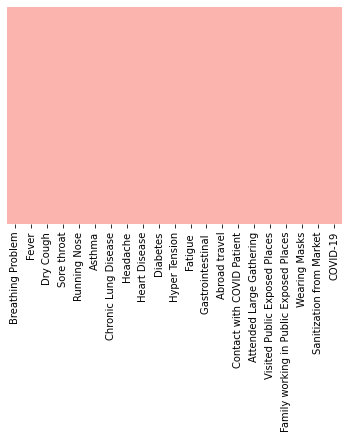

In [ ]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

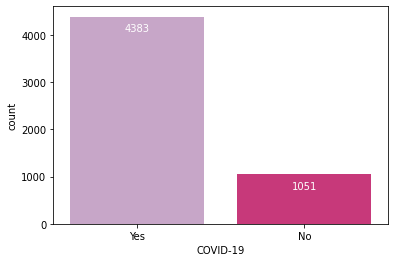

In [ ]:
ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

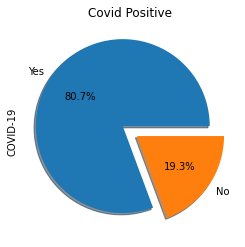

In [ ]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

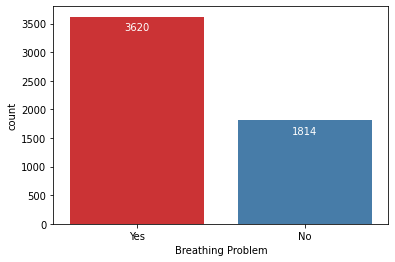

In [ ]:
ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

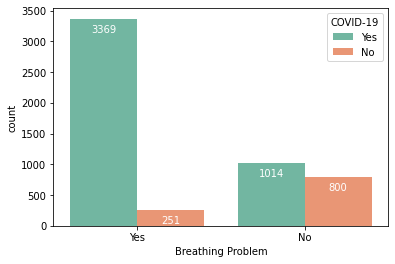

In [ ]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

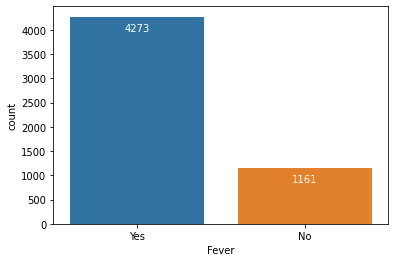

In [ ]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

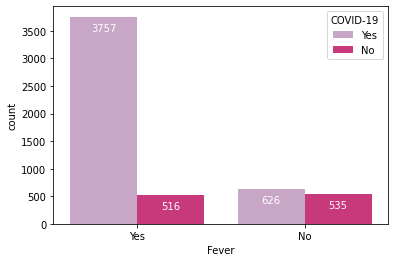

In [ ]:
ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

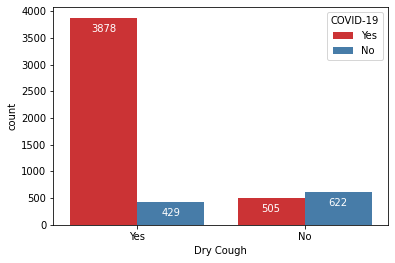

In [ ]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

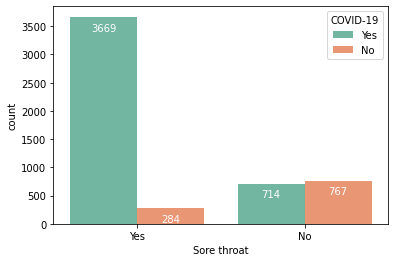

In [ ]:
ax = sns.countplot(x='Sore throat',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

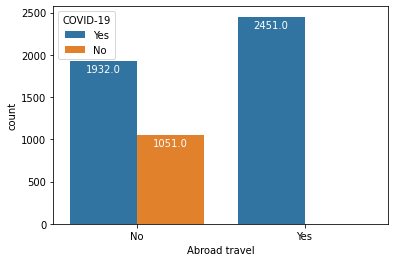

In [ ]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

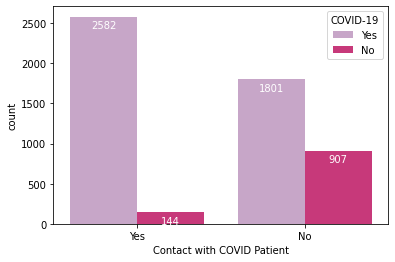

In [ ]:
ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

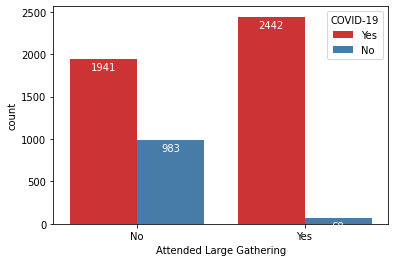

In [ ]:
ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [ ]:
e=LabelEncoder()

In [ ]:
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


In [ ]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


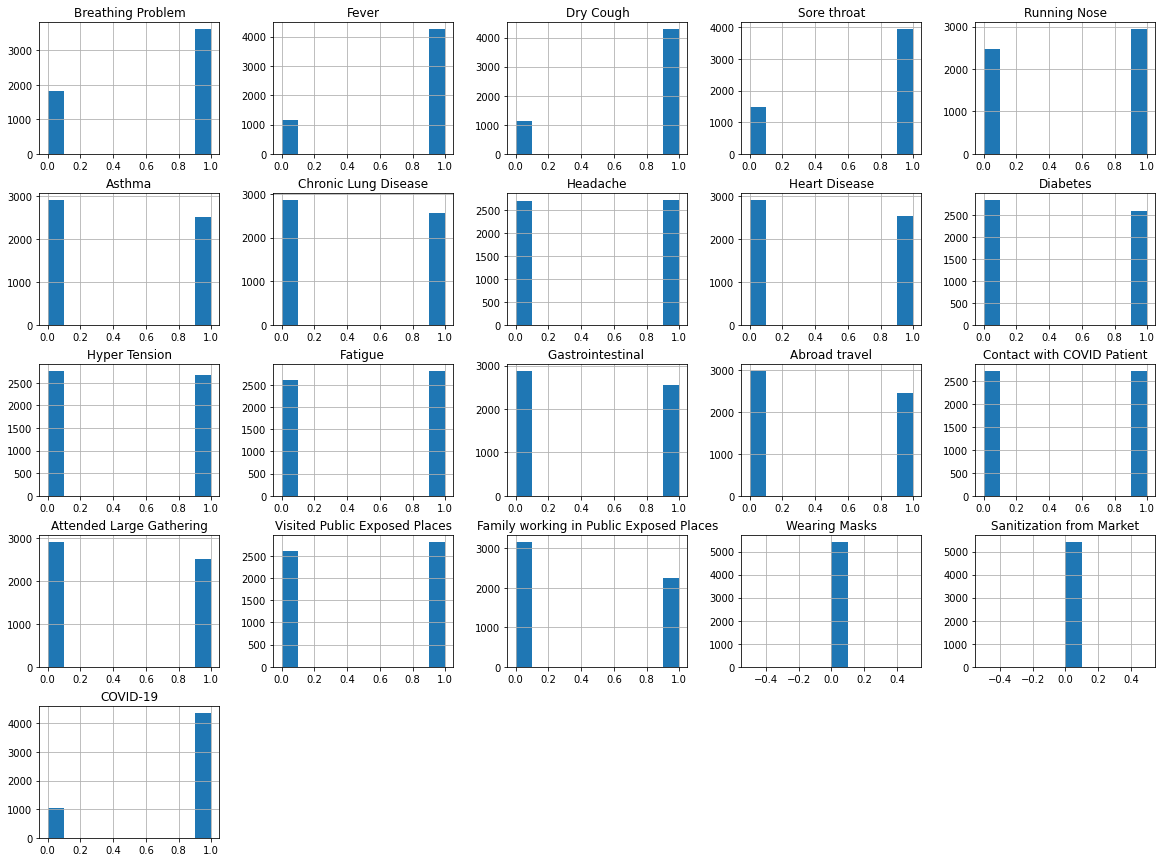

In [ ]:
covid_data.hist(figsize=(20,15));

0    5434
Name: Wearing Masks, dtype: int64


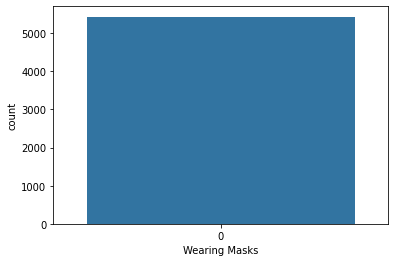

In [ ]:
print(covid_data['Wearing Masks'].value_counts())
sns.countplot(x='Wearing Masks',data=covid_data)

0    5434
Name: Sanitization from Market, dtype: int64


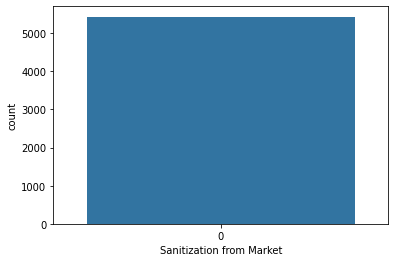

In [ ]:
print(covid_data['Sanitization from Market'].value_counts())
sns.countplot(x='Sanitization from Market',data=covid_data)

In [ ]:
covid_data=covid_data.drop('Wearing Masks',axis=1)
covid_data=covid_data.drop('Sanitization from Market',axis=1)

In [ ]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

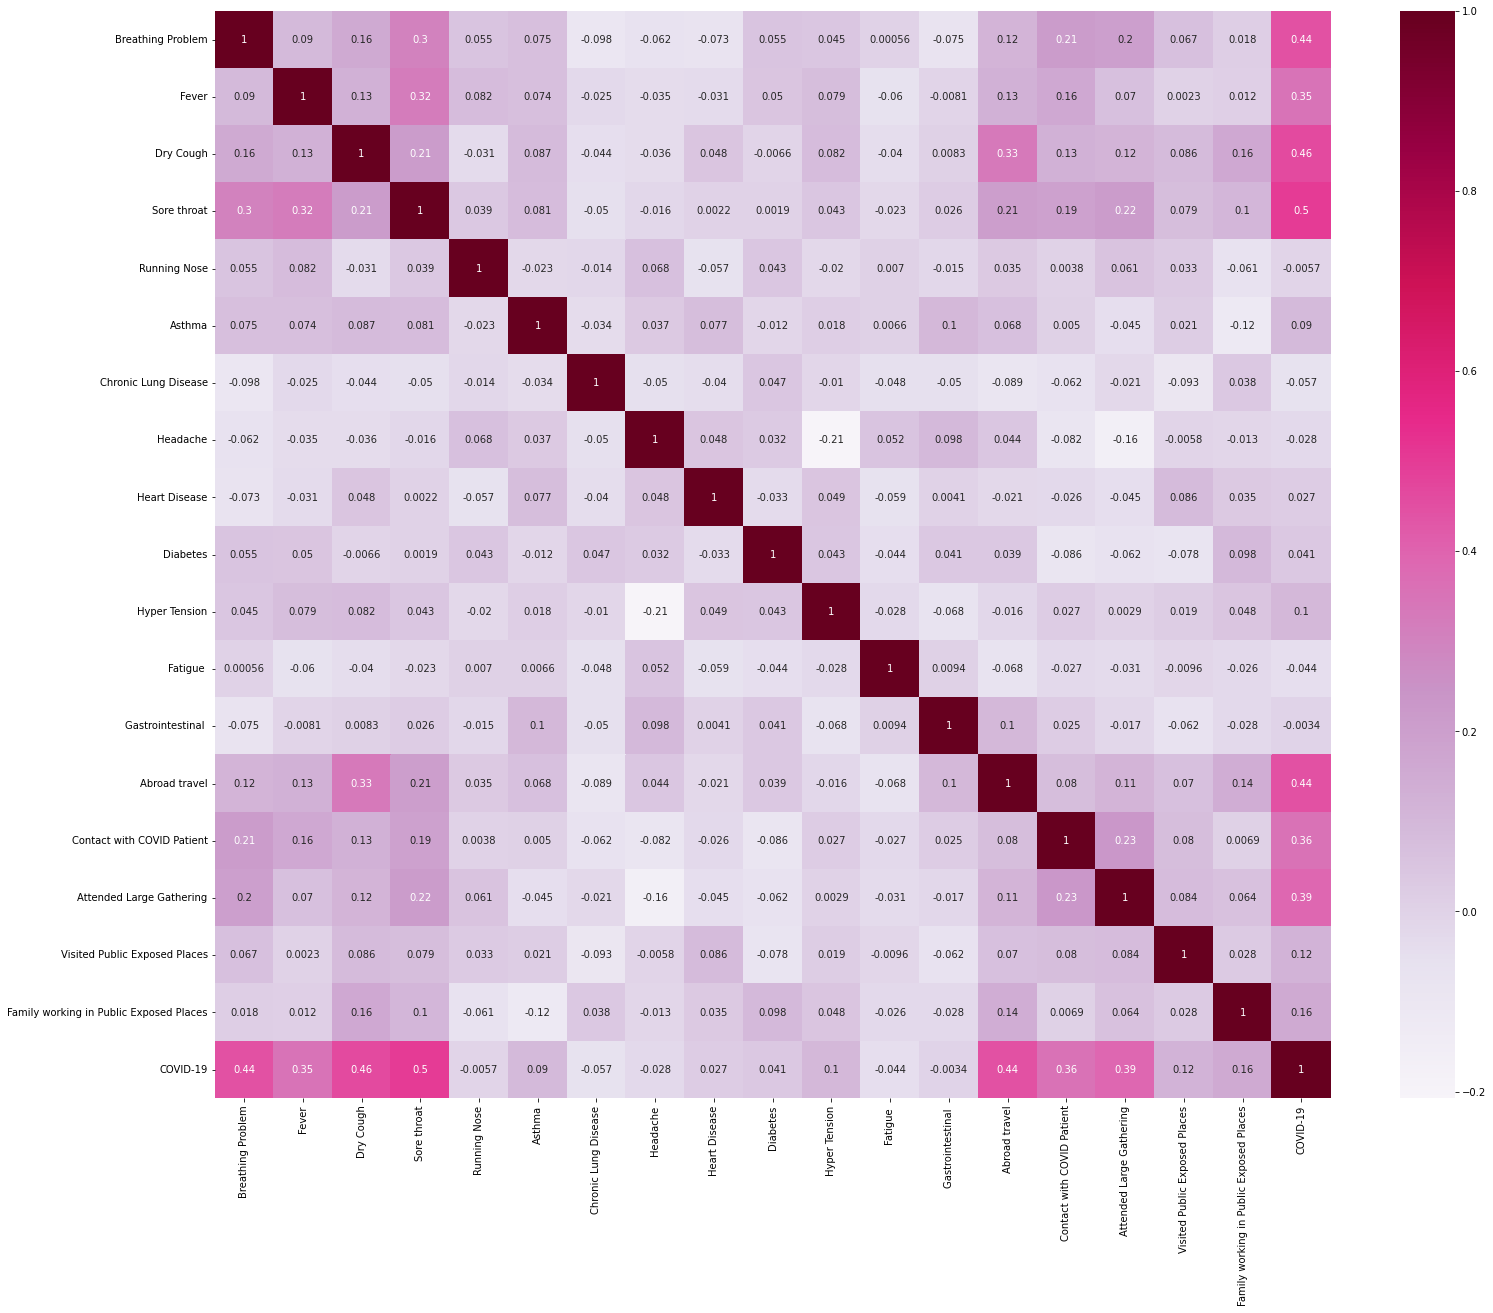

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

In [ ]:
x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [ ]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [ ]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

## LOGISTIC REGRESSION 

LOGISTIC REGRESSION
ROC_AUC value : 93.23107498945218 % 

Mean Squared Error : 3.035878564857406 %

R2 score is : 80.08627006861634 %

Accuracy Score : 97.03243616287095 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087



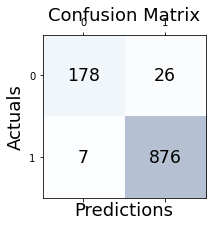

In [ ]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
#acc = lr.score(x_train, y_train)*100
#accuracies['LOGISTIC REGRESSION'] = acc
algo_time['LOGISTIC REGRESSION']=end-start

## K-NEAREST NEIGHBOURS 

In [ ]:
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [ ]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 2}
The best score we have achieved is: 0.9809068423210718


K-NEAREST NEIGHBOURS
ROC_AUC value : 97.47213154797593 % 

Mean Squared Error : 2.5758969641214353 %

R2 score is : 83.10350187640175 %

Accuracy Score : 98.3666896710375 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       204
           1       0.99      0.97      0.98       883

    accuracy                           0.97      1087
   macro avg       0.95      0.97      0.96      1087
weighted avg       0.98      0.97      0.97      1087



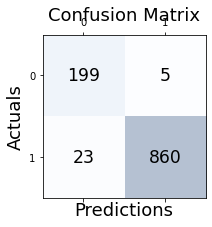

In [ ]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')
#acc = knn_cv.score(x_train, y_train)*100
#accuracies['K-NEAREST NEIGHBOURS'] = acc

## RANDOM FOREST

In [ ]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

In [ ]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

The best paramter we have is: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
The best score we have achieved is: 98.13652897371796


RANDOM FOREST TREE
ROC_AUC value : 96.94474052361602 % 

Mean Squared Error : 2.2079116835326587 %

R2 score is : 85.51728732263008 %

Accuracy Score : 98.38969404186795 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       204
           1       0.99      0.98      0.99       883

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.96      1087
weighted avg       0.98      0.98      0.98      1087



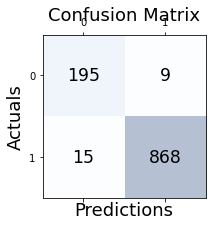

In [ ]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')
#acc = CV_rfc.score(x_train, y_train)*100
#accuracies['RANDOM FOREST TREE'] = acc

## GRADIENT BOOSTING CLASSIFIER

### Decision Tree

### Naive bayes

colors = ["purple", "green", "orange", "blue", "red", "yellow", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=90)
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
!conda install -c plotly plotly
!pip install colorama

/bin/bash: conda: command not found


In [ ]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [ ]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

In [ ]:
fig = px.bar(x=list(r2_scores.keys()), y=list(r2_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="R2 Score Comparision", xaxis_title="Model", yaxis_title="R2 Scores")
fig.show()

In [ ]:
fig = px.bar(x=list(mean_squared_errors.keys()), y=list(mean_squared_errors.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Mean Squared Error Comparision", xaxis_title="Model", yaxis_title="Mean Squared Error")
fig.show()

In [ ]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="ROC Score Comparision", xaxis_title="Model", yaxis_title="ROC Scores")
fig.show()

In [ ]:
import plotly.graph_objects as go
Algos=list(roc_auc_scores.keys())

fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='R2 scores', x=Algos, y=list(r2_scores.values())),
    go.Bar(name='Mean Squared Errors', x=Algos, y=list(mean_squared_errors.values())),
    go.Bar(name='ROC Auc Scores', x=Algos, y=list(roc_auc_scores.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

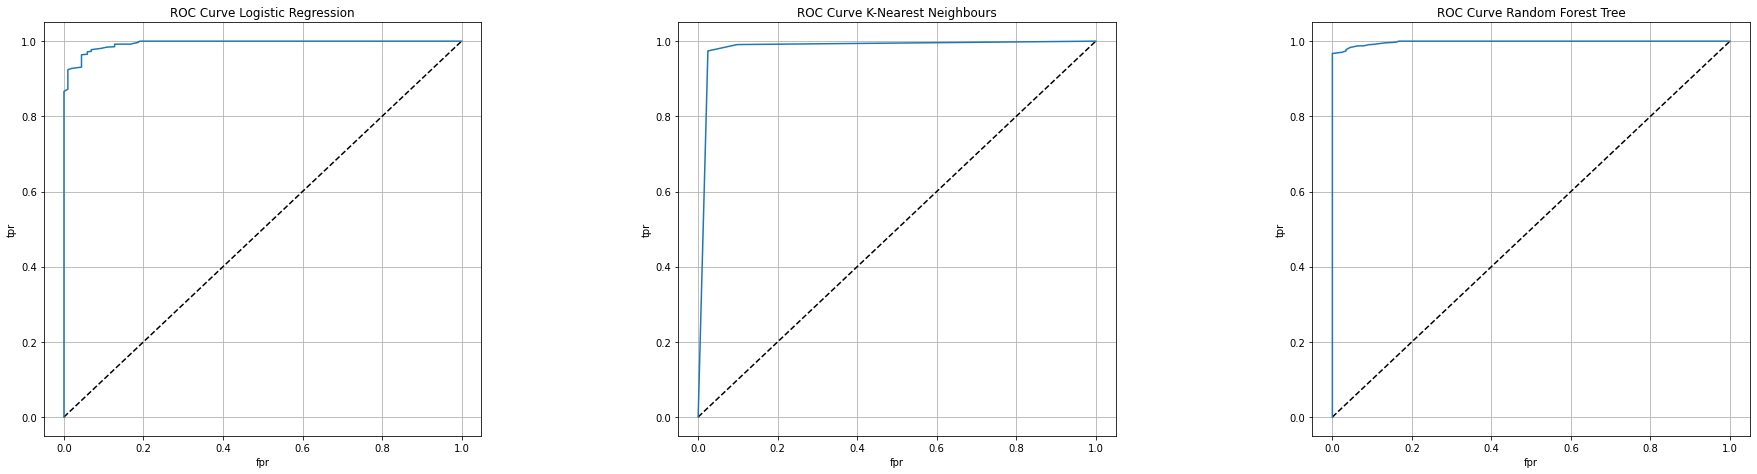

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(25,16))
# Logistic Regression Classification
Y_predict1_proba = lr.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(441)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

Y_predict1_proba = knn_cv.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(442)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve K-Nearest Neighbours')
plt.grid(True)

Y_predict1_proba = CV_rfc.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(443)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest Tree')
plt.grid(True)

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

In [ ]:
import colorama
from colorama import Fore

print("COVID PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")
Breathing_Problem = int(input("Does the patient have breathing problem ? "))
Fever = int(input("Does the patient have fever ? "))
Dry_Cough = int(input("Does the patient have dry cough ? "))
Sore_throat = int(input("Does the patient have sore throat ? "))
Running_Nose = int(input("Does the patient have running nose ? ")) 
Asthma = int(input("Does the patient have any record of asthma ? ")) 
Chronic_Lung_Disease = int(input("Does the patient have any records of chronic lung disease ? ")) 
Headache = int(input("Is the patient having headche ? "))
Heart_Disease = int(input("Does the patient have any record of any heart disease ? "))
Diabetes = int(input("Does the patient have diabetes ? "))
Hyper_Tension = int(input("Does the patient have hyper tension ? ")) 
Fatigue = int(input("Does the patient experience fatigue ? "))
Gastrointestinal = int(input("Does the patient have any gastrointestinal disorders ? "))
Abroad_travel = int(input("Has the patient travelled abroad recently ? "))
Contact_with_COVID_Patient = int(input("Was the patient in contact with a covid patient recently ? "))
Attended_Large_Gathering = int(input("Did the patient attend any large gathering event recently ? "))
Visited_Public_Exposed_Places = int(input("Did the patient visit any public exposed places recently ? "))
Family_working_in_Public_Exposed_Places = int(input("Does the patient have any family member working in public exposed places ? "))

patient = [[Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places]]
result = knn_cv.predict(patient)
print("\nResults : ",result)

if result == 1:
    print(Fore.RED + 'You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14 days!')
    print()
else :
    print(Fore.GREEN + 'You do not have any symptoms of COVID-19. Stay home! Stay safe!')
    print()

COVID PREDICTION BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No
Does the patient have breathing problem ? 1
Does the patient have fever ? 1
Does the patient have dry cough ? 1
Does the patient have sore throat ? 0
Does the patient have running nose ? 1
Does the patient have any record of asthma ? 0
Does the patient have any records of chronic lung disease ? 0
Is the patient having headche ? 0
Does the patient have any record of any heart disease ? 0
Does the patient have diabetes ? 1
Does the patient have hyper tension ? 1
Does the patient experience fatigue ? 1
Does the patient have any gastrointestinal disorders ? 0
Has the patient travelled abroad recently ? 0
Was the patient in contact with a covid patient recently ? 0
Did the patient attend any large gathering event recently ? 1
Did the patient visit any public exposed places recently ? 1
Does the patient have any family member working in public exposed places ? 0

Results :  [1]
You may be affected with COVID-19 virus! Pleas

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

